# PROPIEDADES DE LOS ESTIMADORES OLS

Nava del Río José Antonio
Ojeda Contreras Braulio Melquisedec 
Suárez Pérez Juan Pablo
Vázquez Portuguez José Antonio 

Con la finalidad de observar las propiedades teóricas de los estimadores OLS se cumplen en la práctica, realice las siguientes tareas:
1. Compruebe que los estimadores OLS no tienen sezgo.
2. Compruebe que las varianzas de los estimadores OLS son cercanas a sus valores teóricos.
3. Grafique los histogramas de los estimadores OLS.

In [1]:
# Importamos las bibliotecas necesarias...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Función para generar un modelo lineal de una variable.
def generate_model():
    """
        Modelo lineal de una variable.
        Entrada: 
        Salida: [m,b] m (pendiente), b (intersección con eje y)
    """
    m = np.random.normal(0, 1)
    b = np.random.normal(0, 1)
  
    return [m, b]

In [3]:
# Función para implementar un modelo lineal.
def lineal_model(m, b, x):
    """
        Implementación del modelo
        Entrada: m (pendiente), b (intersección con eje y), x (Vector X)
        Salida: m * x + b (Vector Y)
    """
    return m * x + b

In [4]:
# Parámetros de incialización del modelo lineal.
N = 200
min_x = 0
max_x = 21

In [5]:
# Generación del modelo lineal.
m, b = generate_model()
# Implementación del modelo lineal. 
x = np.linspace(min_x, max_x, N)
lm = lineal_model(m, b, x)

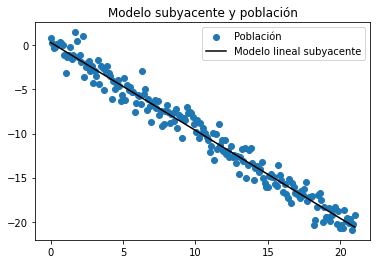

In [6]:
# Generamos puntos para graficar la población.
y = lm + np.random.normal(0, 1, N)
# Grafica el modelo.
plt.scatter(x, y, label="Población")
plt.plot(x, lm, label="Modelo lineal subyacente", color="black")
plt.legend()
plt.title("Modelo subyacente y población")
plt.show()

In [7]:
# Generar el muestreo de la población.
def gen_sampling(min_x, max_x, m, b, n_sample = 50):
    x_sample = np.linspace(min_x, max_x, n_sample)
    lm = lineal_model(m, b, x_sample)
    y_sample = lm + np.random.normal(0, 1, n_sample)
    return [x_sample, y_sample]

In [8]:
# Ajuste de estimadores del modelo lineal.
def adjust_lineal_model(X, y):
    """
        Ajuste del modelo lineal.
        Entrada: X (Muestra de X), y (muestra de Y).
        Salida: m_adj (Estimador m), b_adj (Estimador b).
    """
    m_adj = np.cov(X, y)[0, 1] / np.var(X)
    b_adj = np.mean(y) - m_adj * np.mean(X)
    return [m_adj, b_adj]

In [9]:
nom_samples = 1000
sampling_values = list()
for i in range(nom_samples):
    x_sample, y_sample = gen_sampling(min_x, max_x, m, b)
    m_adj, b_adj = adjust_lineal_model(x_sample, y_sample)
    sampling_values.append([x_sample, y_sample, m_adj, b_adj])

In [10]:
# Compruebe que los estimadores OLS no tienen sesgo
m_adjs = list()
b_adjs = list()
for i in sampling_values:
    m_adjs.append(i[-2])
    b_adjs.append(i[-1])
m_mean = np.array(m_adjs).mean()
b_mean = np.array(b_adjs).mean()
assert np.isclose(m_mean, m, atol = 1e-1), 'Error: La el promedio estimadores m de la implementación ' + str(m_mean) +  ' no se acerca a ' + str(m)
print("El promedio  de los estimadores de m y m son cercanos, m: " + str(m) + " y promedio m: " +  str(m_mean))
assert np.isclose(b_mean, b, atol = 9e-1), 'Error: La el promedio estimadores b de la implementación ' + str(b_mean) +  ' no se acerca a ' + str(b)
print("El promedio  de los estimadores de b y b son cercanos, b: " + str(b) + " y promedio b: " +  str(b_mean))

El promedio  de los estimadores de m y m son cercanos, m: -0.9970670467347769 y promedio m: -1.0175193354231942
El promedio  de los estimadores de b y b son cercanos, b: 0.3226821774693364 y promedio b: 0.5340412515207912


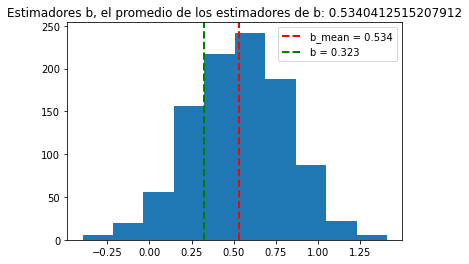

In [11]:
# Grafique los histogramas de los estimadores OLS
plt.hist(b_adjs)
plt.title("Estimadores b, el promedio de los estimadores de b: " + str(b_mean))
plt.axvline(b_mean, color='red', linestyle='dashed', linewidth=2, label=f'b_mean = {b_mean:.3f}')
plt.axvline(b, color='green', linestyle='dashed', linewidth=2, label=f'b = {b:.3f}')
plt.legend()

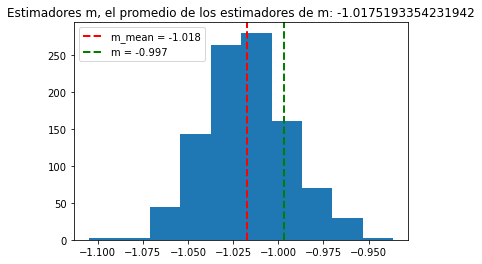

In [12]:
# Grafique los histogramas de los estimadores OLS
plt.hist(m_adjs)
plt.title("Estimadores m, el promedio de los estimadores de m: " + str(m_mean))
plt.axvline(m_mean, color='red', linestyle='dashed', linewidth=2, label=f'm_mean = {m_mean:.3f}')
plt.axvline(m, color='green', linestyle='dashed', linewidth=2, label=f'm = {m:.3f}')
plt.legend()

In [13]:
# Compruebe que las varianzas de los estimadores OLS son cercanas a sus valores teóricos.
b_var = b_adj.var()
m_var = m_adj.var()
var_b1 = list()
var_b0 = list()
for iteration_value in sampling_values:
    y_adj = lineal_model(iteration_value[2], iteration_value[3], iteration_value[0])
    u_estimator = iteration_value[1] - y_adj
    ssr = np.sum(u_estimator ** 2)
    x_mean = np.mean(iteration_value[0])
    sst_x = np.sum((iteration_value[0] - x_mean) ** 2)
    var_est = ssr / (len(u_estimator) - 2)
    var_b1.append(var_est / sst_x)
    var_b0.append(var_est / (len(u_estimator) * sst_x) * np.sum(iteration_value[0] ** 2))
mean_var_b1 = np.mean(var_b1)
mean_var_b0 = np.mean(var_b0)
print(mean_var_b0)
print(b_var)
print(mean_var_b1)
print(m_var)

0.07943056921473521
0.0
0.0005348859879780149
0.0
